In [36]:
# !gdown https://drive.google.com/uc?id=1ypa5iZ1dLDO-zGRO_yDXrJnMvjRGUG4v

In [1]:
import numpy as np
import pandas as pd

In [29]:
human = pd.read_csv('./HumanActivityRecognition/train.csv')
human_test = pd.read_csv('./HumanActivityRecognition/test.csv')
human_test.shape

(2947, 563)

### 데이터 준비
- 결측치
- 중복치
- X,y 분리
- y를 encoding

- scailing (표준 정규화)
- GridSearchCV : best model 찾기
- 테스트 파일 읽어서, score 계산하기

### Data Information

In [3]:
human.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [4]:
human.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [5]:
# no NaN
human.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [6]:
human['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [31]:
df = human.copy()
df_test = human_test.copy()
df_test.shape

(2947, 563)

In [8]:
df['subject'].value_counts()

25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: subject, dtype: int64

### Data Processing

In [33]:
X_train = df.iloc[:,:-1]
X_test = df_test.iloc[:,:-1]
y_train = df.iloc[:,-1]
y_test = df_test.iloc[:,-1]

print(X_test.shape,y_test.shape)

(2947, 562) (2947,)


### Encoding Processing

In [34]:
df['Activate']=df['Activity'].map({'LAYING':0,'STANDING':1,
                    'SITTING':2,'WALKING':3,
                   'WALKING_UPSTAIRS':4,'WALKING_DOWNSTAIRS':5})
df_test['Activate']=df_test['Activity'].map({'LAYING':0,'STANDING':1,
                    'SITTING':2,'WALKING':3,
                   'WALKING_UPSTAIRS':4,'WALKING_DOWNSTAIRS':5})
df['Activate'].value_counts()

0    1407
1    1374
2    1286
3    1226
4    1073
5     986
Name: Activate, dtype: int64

### Standard normalization

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
y_train = y_train.values

In [36]:
print(type(X_train),type(y_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


### Estimate

In [130]:
# GridSearch

# grid search 할때 민테 param_range 범위를 설정을 크게하면 잘못서칭가능서있음
# 적은 폭으로 하면 밑에 range가 폭임 적은폭으로하면 그렇게된다.
param_range = [0.001,0.01,0.1,1,10,100,1000]

params = [
    {
        'C' : param_range,
        'gamma' : param_range,
        'kernel' : ['rbf']
    },
    {
        'C' : param_range,
        'kernel' : ['linear']
    },
    {
        'C' : param_range,
        'degree' : [2,3], 
        'kernel' : ['poly']
    }
]

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

clf = SVC(random_state=2022)
gs = GridSearchCV(estimator = clf,
                  param_grid = params,
                  scoring = 'accuracy',
                  cv = 3,
                  n_jobs = -1,
                  verbose = 3
                 )
gs.fit(X_train,y_train)

NameError: name 'params' is not defined

In [58]:
# 여기서 GridSearch 를 다시 또 해야한다.
gs.best_estimator_

In [59]:
gs.best_score_

In [60]:
gs.best_params_

### test

In [37]:
clf = SVC(C= 0.1, kernel='linear',random_state = 2022)
clf.fit(X_train,y_train)

SVC(C=0.1, kernel='linear', random_state=2022)

In [55]:
scaler = StandardScaler()
scaler.fit(X_test)
X_test = scaler.transform(X_test)
# y_test = y_test.values

In [23]:
# Random Forest
# Xgboost
# light GBM

In [56]:
X_test.mean()

2.484862176942412e-17

In [57]:
X_test.shape

(2947, 562)

In [58]:
y_pred = clf.predict(X_test)

In [59]:
import myutils as my

In [60]:
my.print_score(y_test,y_pred,average='weighted')

accuracy: 0.9650492025788938
precision: 0.9652460401923605
recall: 0.9652460401923605


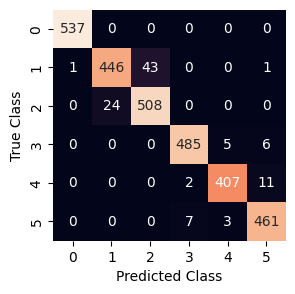

In [61]:
my.plot_confusion_matrix(y_test, y_pred)